### Dataset Information

**Feature     Description**

**Store :**       Store number

**Date :**      Week of Sales

**Weekly_Sales :**  Sales for the given store in that week

**Holiday_Flag :** If it is a holiday week

**Temperature :**  Temperature on the day of the sale

**Fuel_Price :**  Cost of the fuel in the region

**CPI Consumer :** Price Index

**Unemployment :**  Unemployment Rate




---



### Importing primary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read the dataset
df = pd.read_csv('/content/Walmart DataSet.csv')

In [3]:
## check first 5 rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
## Check total no of rows and columns
df.shape

(6435, 8)



---



### Data preprocessing

In [5]:
## check information like datatypes,entries etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
##Change the date column from objetc to date time format\
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [7]:
print(df.dtypes)

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
## Check Statistical figure from all the dataset
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


Weekly_Sales Total Count = 6435.00

weekly_Avg_sales = 1,046,965

Weekly_Min_sales =  209,986.2

Weekly_Max_Sales = 3,818,686


### Exploratory Data Analysis

In [10]:
## Check Null Values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

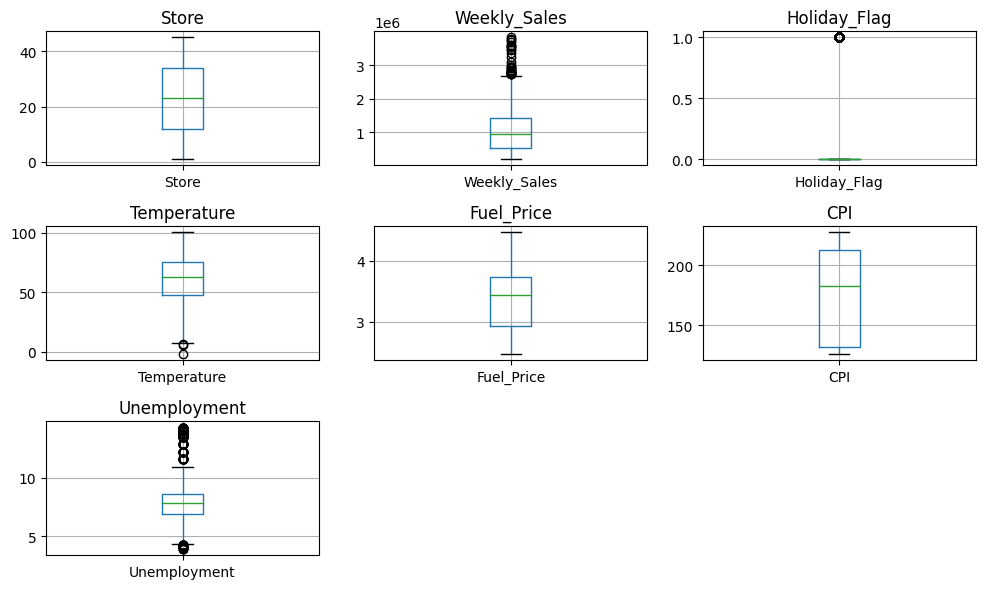

In [11]:
## lets check if outlier available or not
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    df.boxplot(column=column)
    plt.title(column)
    plt.tight_layout()

plt.show()



In [12]:
numerical_col = df.select_dtypes(include=['int64', 'float64'])

Q1 = numerical_col.quantile(0.25)
Q3 = numerical_col.quantile(0.75)
IQR = Q3 - Q1

# Set lower bound and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using IQR method
outliers = ((numerical_col < lower_bound) | (numerical_col > upper_bound)).any(axis=1)

# Print column names and indices of rows containing outliers
for col in numerical_col.columns:
    outlier_indices = df.index[outliers & ((numerical_col[col] < lower_bound[col]) | (numerical_col[col] > upper_bound[col]))]
    if len(outlier_indices) > 0:
        print("Outliers in column '{}':".format(col))
        print(outlier_indices)



Outliers in column 'Weekly_Sales':
Index([ 189,  241,  471,  474,  475,  523,  526,  527,  761, 1329, 1332, 1333,
       1381, 1385, 1758, 1761, 1762, 1810, 1813, 1814, 1901, 1904, 1905, 1957,
       2759, 2761, 2762, 2763, 2811, 2814, 2815, 3192, 3764, 3816],
      dtype='int64')
Outliers in column 'Holiday_Flag':
Index([   1,   31,   42,   47,   53,   83,   94,   99,  105,  135,
       ...
       6293, 6323, 6334, 6339, 6345, 6375, 6386, 6391, 6397, 6427],
      dtype='int64', length=450)
Outliers in column 'Temperature':
Index([910, 2336, 3626], dtype='int64')
Outliers in column 'Unemployment':
Index([ 555,  556,  557,  558,  559,  560,  561,  562,  563,  564,
       ...
       5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719],
      dtype='int64', length=481)




---



 ### 1.If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

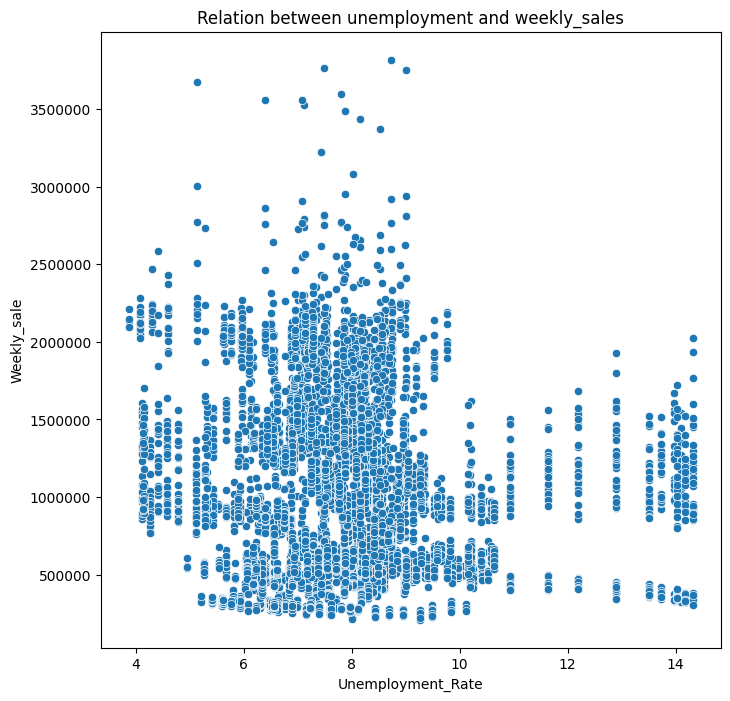

In [13]:
## lets check the relation between the sales and unemployment

plt.figure(figsize = (8,8))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')

# Set y-axis to display actual sales values
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.title('Relation between unemployment and weekly_sales')
plt.xlabel('Unemployment_Rate')
plt.ylabel('Weekly_sale')
plt.show()


In the scatter plot, it is evident that as the unemployment rate increases, the weekly sales decrease. This observation suggests a negative correlation between unemployment rate and weekly sales.

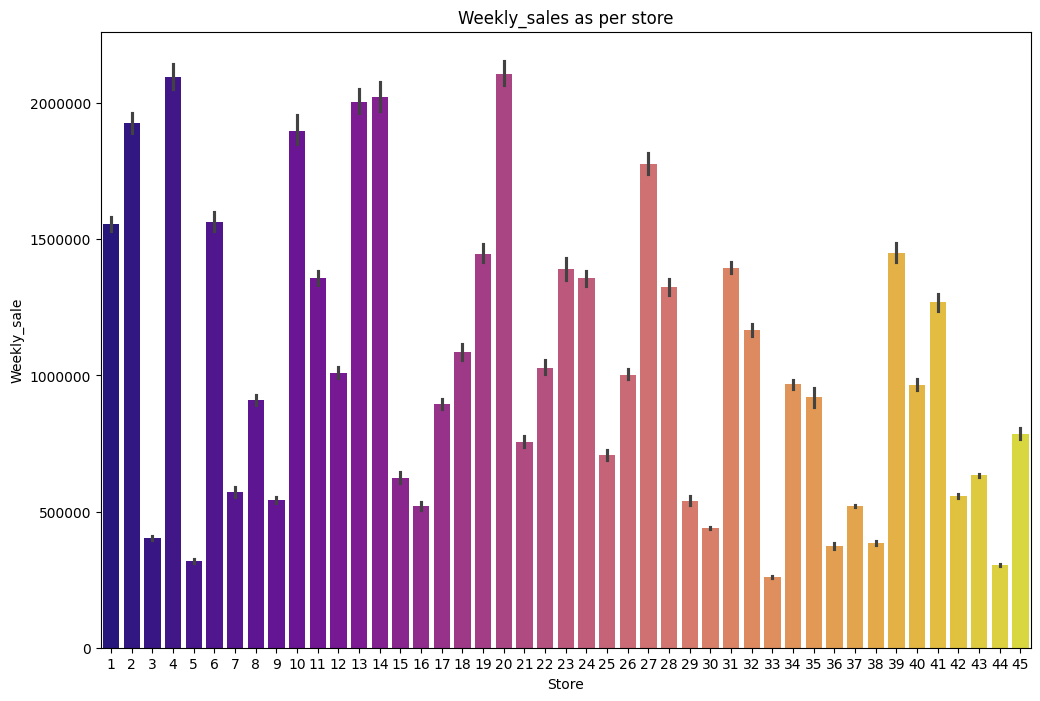

In [14]:
## if yes - which stores are suffering the most?
##lets check which store is is effecting the weekly sales

plt.figure(figsize = (12,8))
sns.barplot(data= df, x = 'Store',y = 'Weekly_Sales', palette= 'plasma')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.title('Weekly_sales as per store')
plt.xlabel('Store')
plt.ylabel('Weekly_sale')
plt.show()

In the bar plot, it's evident that **Store Number 33** exhibits lower weekly sales compared to other stores. This insight can be gleaned from the relative height of the bar representing Store 33, which is noticeably shorter in comparison to bars representing other stores.



---





### 2.If the weekly sales show a seasonal trend, when and what could be the reason?

In [15]:
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True) # Sorting the values in the dataframe to ascending
df_date_sales.head(5) # Looking at first five data points

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [16]:
df_date_sales.shape

(143, 2)

Text(0, 0.5, 'Sales')

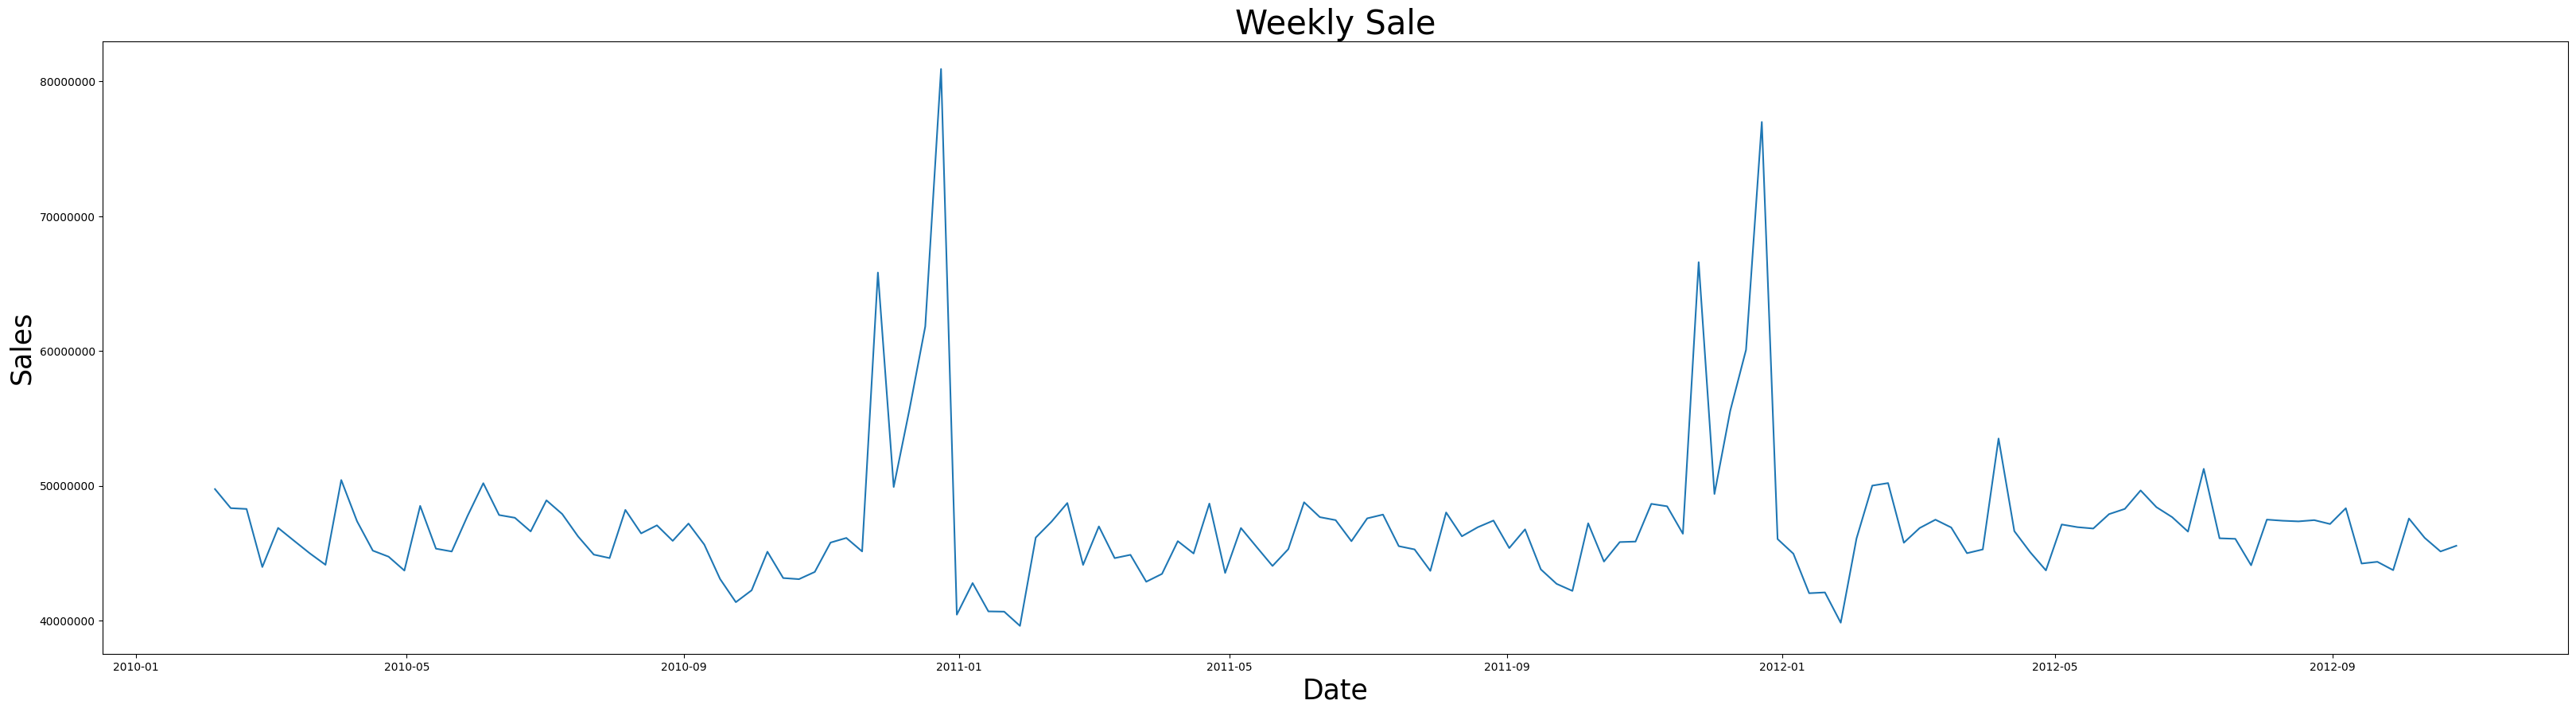

In [17]:
# Plot the seasonal trend using the weekly sales data
# Plotting the line chart for checking the trend of weekly sales
plt.figure(figsize=(40,10))
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales) # line plot
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Weekly Sale',fontsize=30)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Sales',fontsize=25)

Over a two-year period, the company's weekly sales displayed a seasonal tendency that appears in the picture. The tendency expresses itself throughout the year as recurrent cycles that occur regularly at prearranged intervals. Notably, sales exhibit winter and summer peaks as well as spring and fall decreases. Constant cyclical fluctuation, indicating predictable differences in sales performance at different times of the year, is a defining characteristic of seasonal patterns.

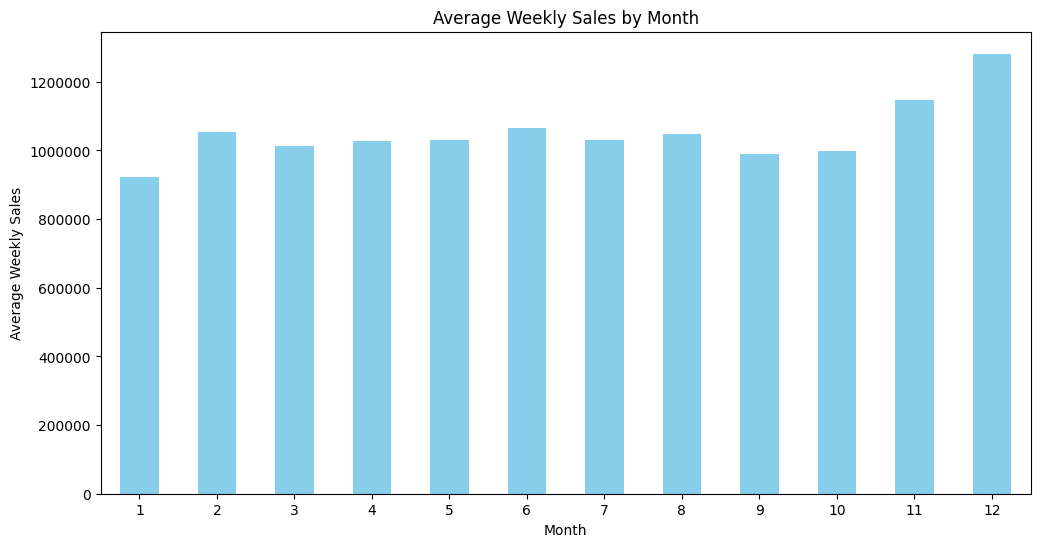

In [18]:
# Extract year and month from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Visualize average weekly sales by month
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar', color='skyblue')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()


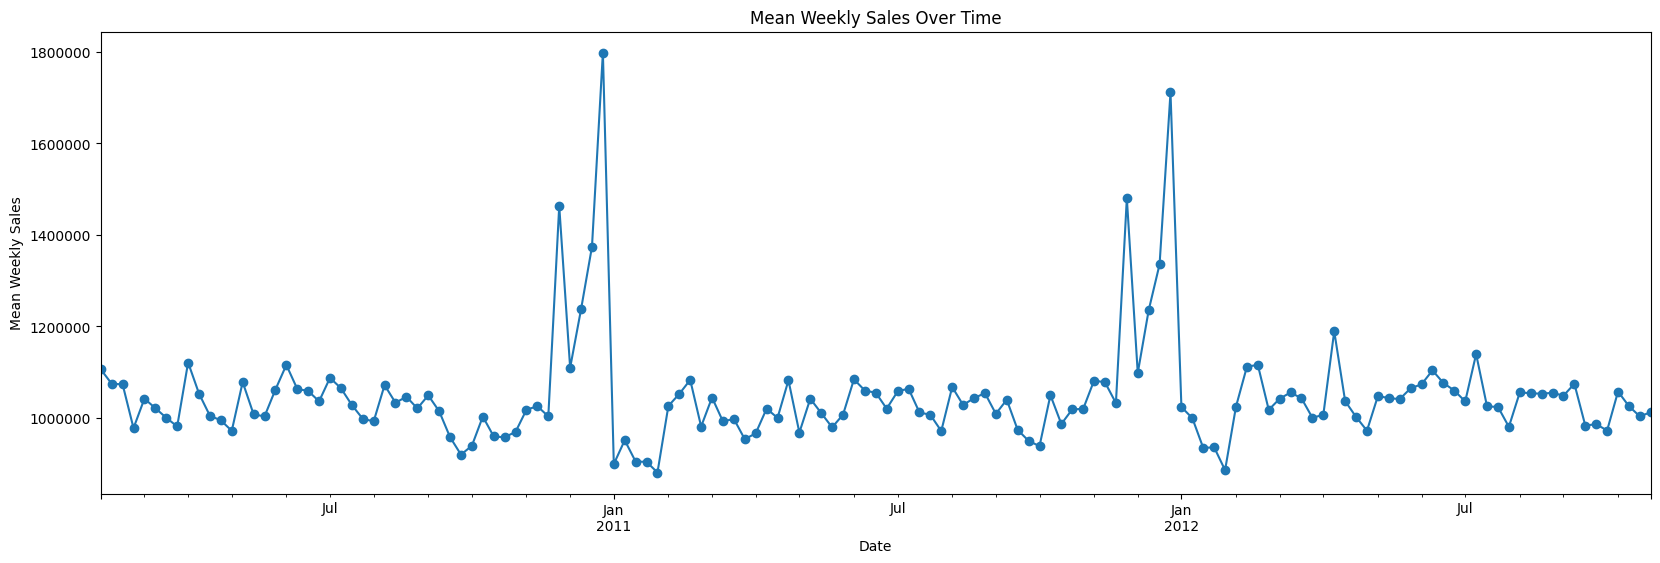

In [19]:
# Resample the data to calculate the mean weekly sales
df.set_index('Date', inplace=True)
mean_weekly_sales = df['Weekly_Sales'].resample('W').mean()

# Plot the mean weekly sales over time
plt.figure(figsize=(20, 6))
mean_weekly_sales.plot(marker='o')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Mean Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Weekly Sales')
# plt.grid(True)
plt.show()

Since we can readily get wintertime sales, which are at their peak from November to January, I have calculated an average weekly sales throughout time.





---



## lets check if Holidays effect on sales

In [20]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

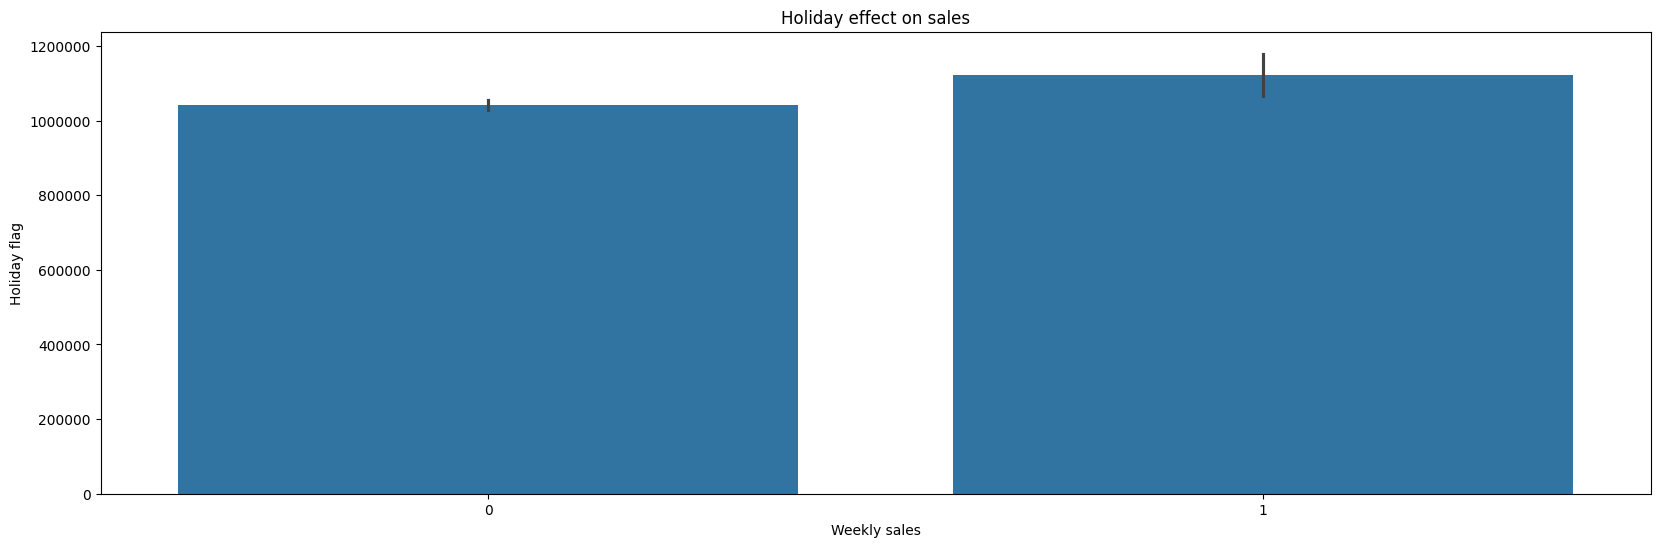

In [21]:
#plot the holiday flag
plt.figure(figsize=(20, 6))
sns.barplot(data = df, x = 'Holiday_Flag',y = 'Weekly_Sales')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Holiday effect on sales')
plt.xlabel('Weekly sales')
plt.ylabel('Holiday flag')
# plt.grid(True)
plt.show()

In [22]:
df_holiday_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [23]:
df_holiday_Sales

,Holiday_Flag,Weekly_Sales
0,0,6.231919e+09
1,1,5.052996e+08


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

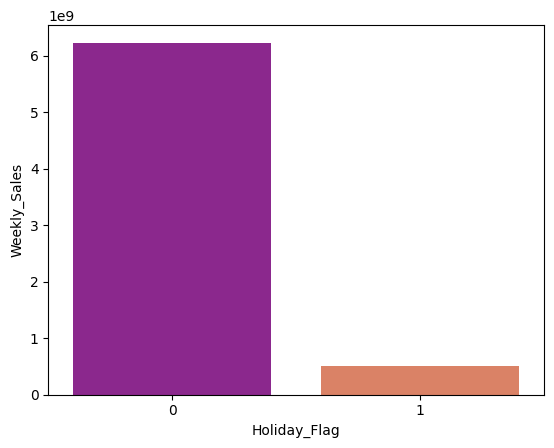

In [24]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_holiday_Sales,palette = 'plasma') # Plotting the distribution

The Sales are High In Normal Days, it is Quite common because of that holidays are always low compared to working days

### 3.Does temperature affect the weekly sales in any manner?

In [25]:
df['Temperature'].value_counts()

Temperature
50.43    11
67.87    10
76.67     9
76.03     9
70.28     9
         ..
34.93     1
38.53     1
41.10     1
45.54     1
74.09     1
Name: count, Length: 3528, dtype: int64

In [26]:
df['Temperature'].min()

-2.06

In [27]:
df['Temperature'].max()

100.14

Correlation between Temperature and Weekly Sales: -0.06381001317946852


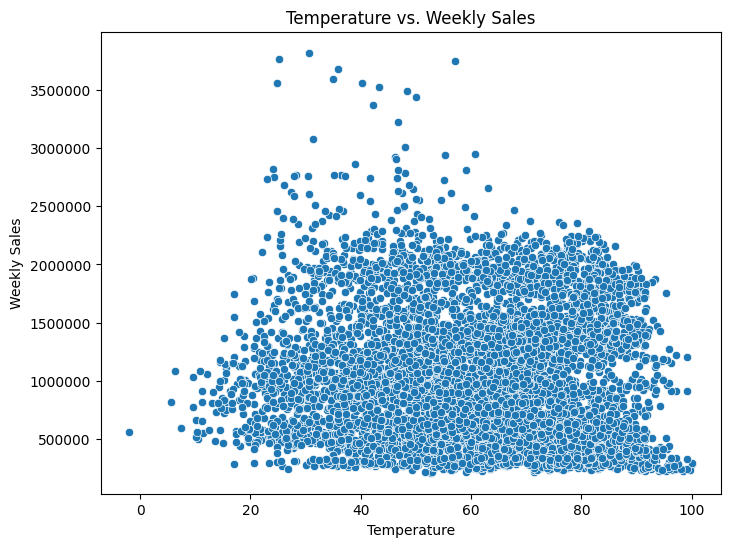

In [28]:
# Correlation between Temperature and Weekly Sales
temp_corr = df[['Temperature', 'Weekly_Sales']].corr().iloc[0, 1]
print("Correlation between Temperature and Weekly Sales:", temp_corr)

# Scatter plot of Temperature vs. Weekly Sales for understanding the relation of Week sales per temperature(farenheit)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


Positive Correlation between the temp and weekly sales ,meaning that sales tend to be higher when the temp is higher. For example ,people may be more likely to go shopping when the weather is nice.



---



In [29]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month'],
      dtype='object')

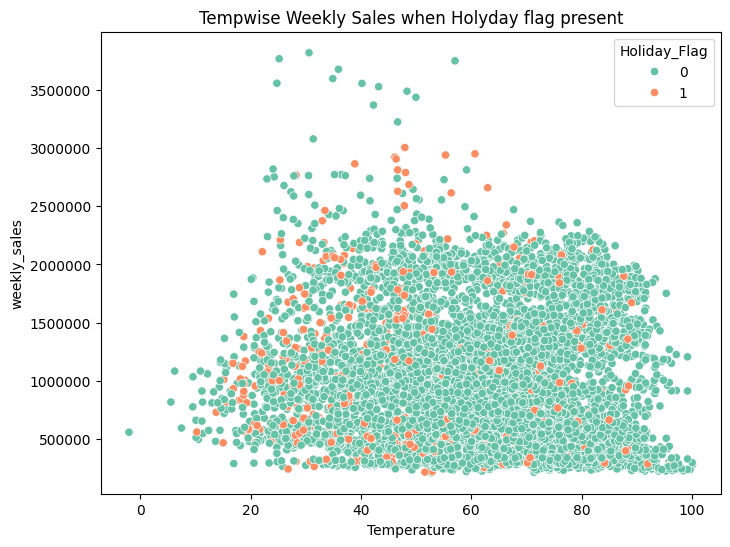

In [30]:
## lets check the weekly sales as per temp when Holiday_flag is available

plt.figure(figsize = (8,6))
sns.scatterplot(data = df,x = 'Temperature' , y = 'Weekly_Sales' , hue = 'Holiday_Flag',palette='Set2')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Tempwise Weekly Sales when Holyday flag present')
plt.xlabel('Temperature')
plt.ylabel('weekly_sales')
plt.show()


Overall the graph shows that there is positive correlation between temperature and weekly sales ,but there is lot of scatter in the data.

The holyday flag does not seem to have strong effect on weely sales.



---



### 4.How is the Consumer Price index affecting the weekly sales of various stores?

In [31]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Date,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [32]:
df['CPI'].min()

126.064

In [33]:
df['CPI'].max()

227.2328068

Correlation between CPI and Weekly Sales: -0.0726341620401742


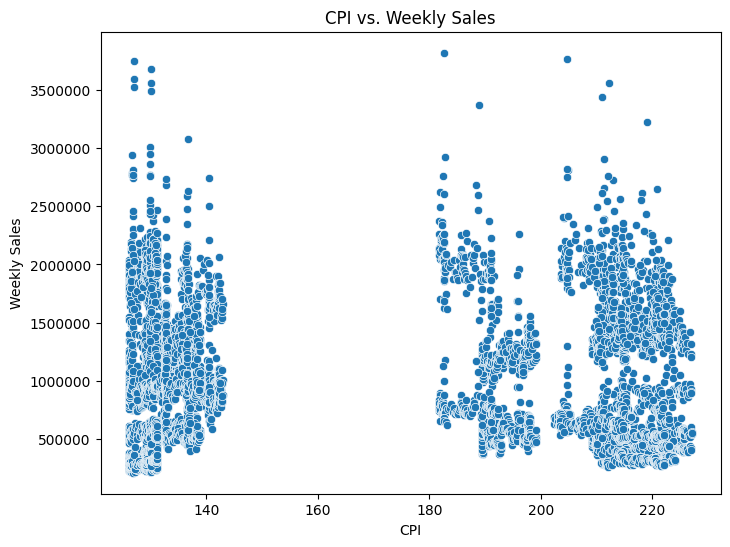

In [34]:
## how Cpi reflect the weekly sales

# Correlation between CPI and Weekly Sales
cpi_corr = df[['CPI', 'Weekly_Sales']].corr().iloc[0, 1]
print("Correlation between CPI and Weekly Sales:", cpi_corr)

# Scatter plot of CPI vs. Weekly Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()




The scatter plot shows that there is positive relation btwn the CPI and weekly sales.This means that as the CPI increses,weekly sales also tend to increse.

There is lot of variation in the data,however.This means that there are some weeks where sales are high even wheb CPI is low, and vice versa.
this could be due to number of factor,such as seasonal fluctuation.

In [35]:
## Lets check the relation btwn the CPI and weekly sales by using bin of cpi
df['CPI'].unique()

array([211.0963582, 211.2421698, 211.2891429, ..., 214.6772833,
       214.7212488, 214.7415392])

In [36]:
#create bins
bins1=[125,155,185,215,245]
labels1=['125-155','156-185','186-215','216-245',]

In [37]:
df['Category_cpi']= pd.cut(df['CPI'],bins=bins1,labels=labels1) ## creating new column

In [38]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Category_cpi
Date,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,186-215
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,186-215
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,186-215
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,186-215
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,186-215


In [39]:
df['Category_cpi'].value_counts()

Category_cpi
125-155    3146
186-215    2010
216-245    1159
156-185     120
Name: count, dtype: int64

In [40]:
df_Cpi_cat_Sales = df.groupby('Category_cpi')['Weekly_Sales'].sum().reset_index()

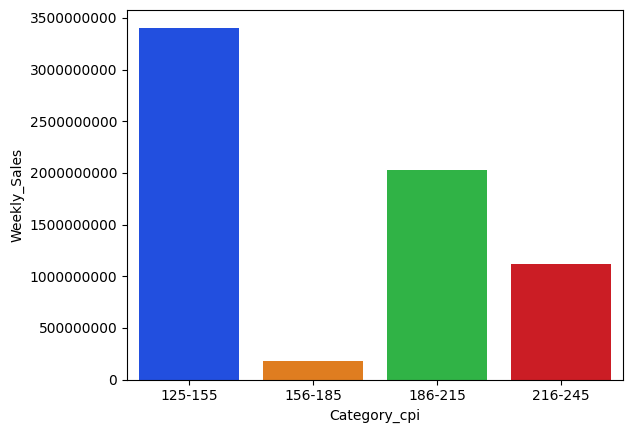

In [41]:
sns.barplot(x='Category_cpi',y='Weekly_Sales',data=df_Cpi_cat_Sales,palette = 'bright')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

when inflation is lower the performance of stores are high

in intial time of inflation the sale were drop signficantly



---



### 5.Top performing stores according to the historical data. and bottom one

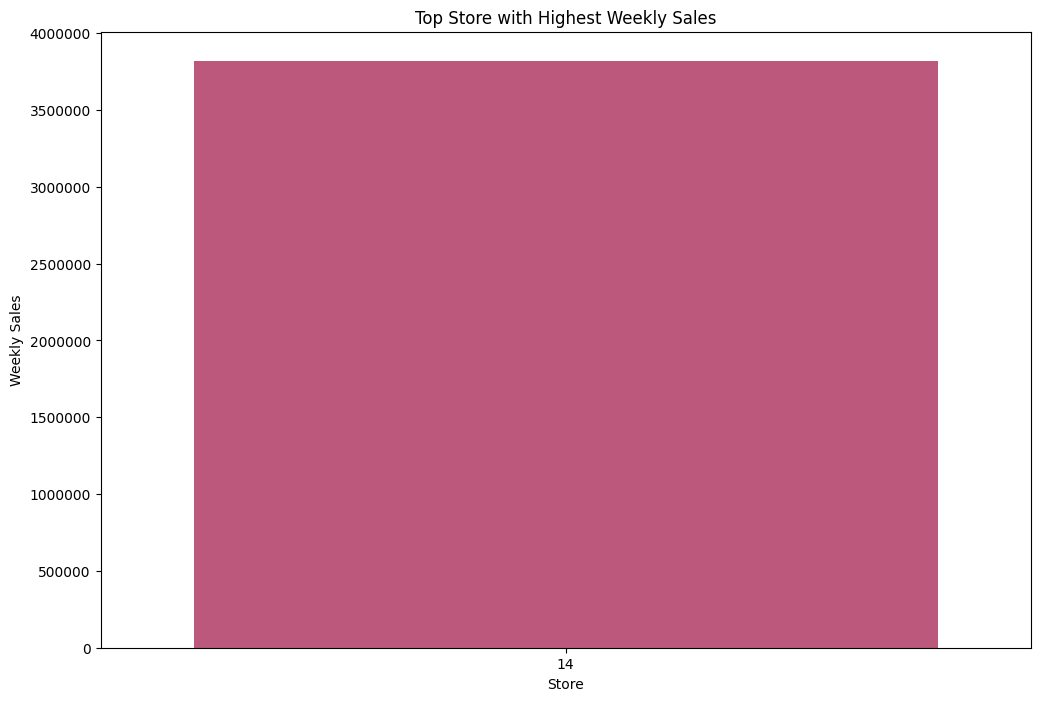

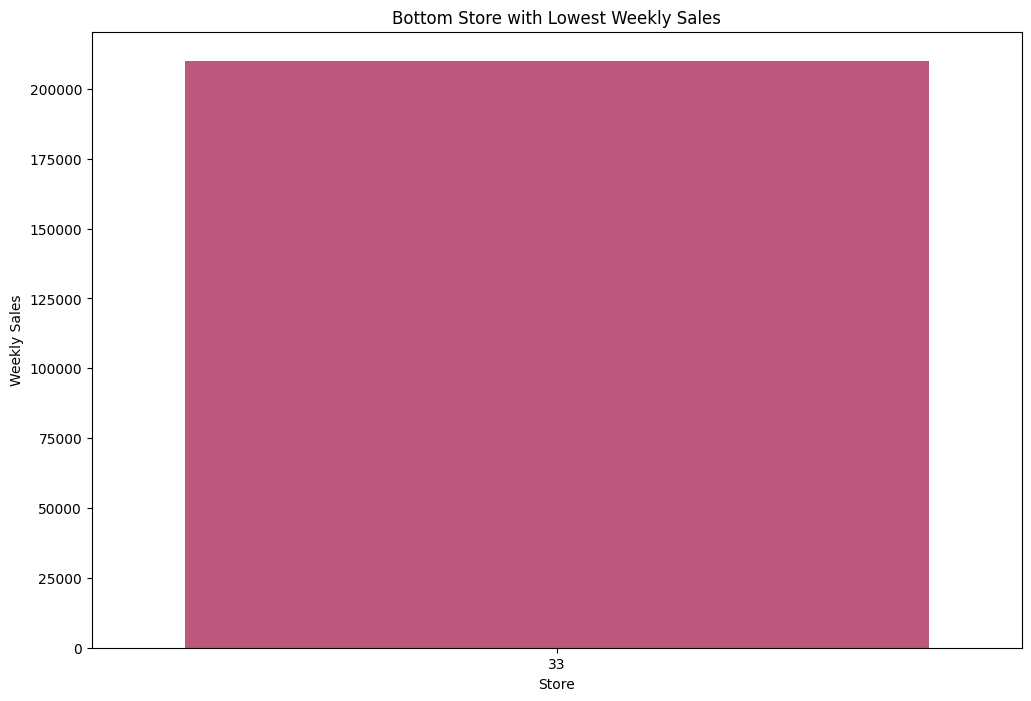

In [43]:
# Sort the DataFrame by 'Weekly_Sales' in descending order
df_sorted = df.sort_values(by='Weekly_Sales', ascending=False)

# Select the top 5 stores
top_store = df_sorted.head(1)

# Select the bottom 5 stores
bottom_store = df_sorted.tail(1)

# Plot top 5 stores
plt.figure(figsize=(12, 8))
sns.barplot(data=top_store, x='Store', y='Weekly_Sales', palette='plasma')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Top Store with Highest Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

# Plot bottom 5 stores
plt.figure(figsize=(12, 8))
sns.barplot(data=bottom_store, x='Store', y='Weekly_Sales', palette='plasma')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Bottom Store with Lowest Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()




Upon visualizing the barplot, it is evident that Store number 14 exhibits the highest weekly sales among all stores.



---



### 6.The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [44]:
storewise_weekly_sales = df.groupby('Store')['Weekly_Sales'].max().sort_values(ascending=True)
print(storewise_weekly_sales)

# Calculate the mean weekly sales of the worst performing store (store 33)
worst_store_sales = df[df['Store'] == 33]['Weekly_Sales'].mean()
print(f'Mean weekly sales of the worst performing store (Store 33): {worst_store_sales}')

# Calculate the mean weekly sales of the best performing store (store 14)
best_store_sales = df[df['Store'] == 14]['Weekly_Sales'].mean()
print(f'Mean weekly sales of the best performing store (Store 14): {best_store_sales}')

# Calculate the difference between the means
mean_difference = best_store_sales - worst_store_sales
print(f'The mean difference between the best store and the worst store is: {mean_difference}')

Store
33     331173.51
44     376233.89
36     489372.02
38     499267.66
5      507900.07
30     519354.88
37     605791.46
3      605990.41
42     674919.45
43     725043.04
9      905324.68
16    1004730.69
7     1059715.27
29    1130926.79
25    1295391.19
17    1309226.79
15    1368318.17
8     1511641.09
26    1573982.47
21    1587257.78
34    1620748.25
40    1648829.18
45    1682862.03
12    1768249.89
35    1781866.98
32    1959526.96
22    1962445.04
28    2026026.39
18    2027507.15
31    2068942.97
41    2263722.68
11    2306265.36
24    2386015.75
1     2387950.20
39    2554482.84
19    2678206.42
6     2727575.18
23    2734277.10
27    3078162.08
2     3436007.68
13    3595903.20
4     3676388.98
10    3749057.69
20    3766687.43
14    3818686.45
Name: Weekly_Sales, dtype: float64
Mean weekly sales of the worst performing store (Store 33): 259861.692027972
Mean weekly sales of the best performing store (Store 14): 2020978.400979021
The mean difference between the best sto

The above code calculates the weekly sales for each store and determines the difference between the highest and lowest sales values. The resulting difference is 3,487,512.94.

In [46]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Category_cpi
Date,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,186-215
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,186-215
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,186-215
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,186-215
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,186-215


In [49]:
df.drop('Category_cpi',axis =1,inplace = True)

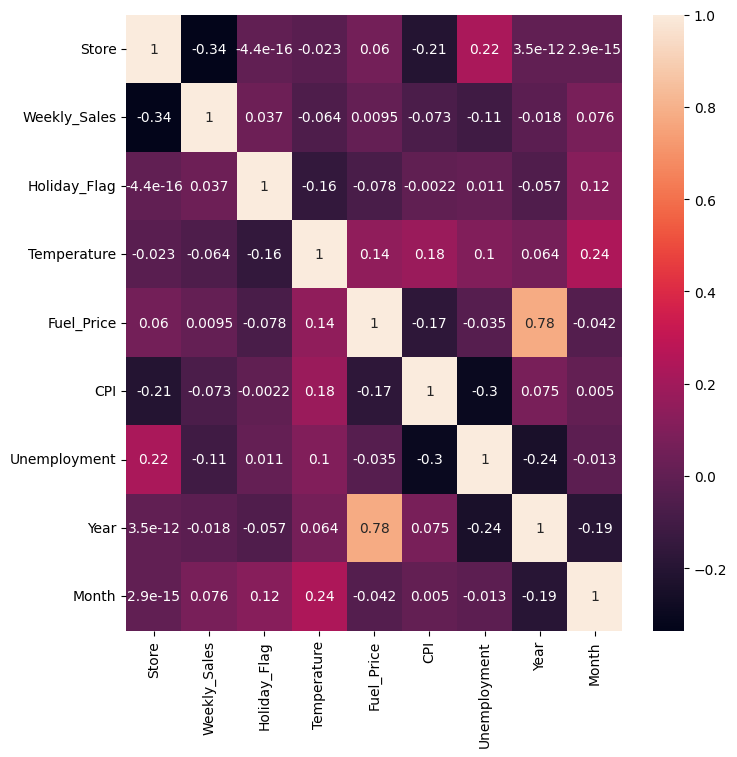

In [50]:
## check corr
corr = df.corr()

plt.figure(figsize = (8,8))
sns.heatmap(data = corr,annot=True,)
plt.show()



---



Now we will start working on forecast the sales for each store for the next 12
weeks.

In [51]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [52]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Date,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [53]:
## Excluding all the varibales and considering the date and sales data for model building
## groupby operation on the DataFrame df based on the 'Date' column. It then calculates the sum of the 'Weekly_Sales' column for each unique date and resets the index to make the result a DataFrame again
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [54]:
df_stores_sales.head()

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [55]:
df_stores_sales.set_index('Date',inplace=True) # Setting the Date column as an Index

In [56]:
# check for stationarity
def adf_test(series, title=''): # creating a function
#Perform Augmented Dickey-Fuller test for stationarity on a given time series.
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [57]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -5.908298e+00
p-value                 2.675979e-07
# lags used             4.000000e+00
# observations          1.380000e+02
critical value (1%)    -3.478648e+00
critical value (5%)    -2.882722e+00
critical value (10%)   -2.578065e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [58]:
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

Figure(640x480)


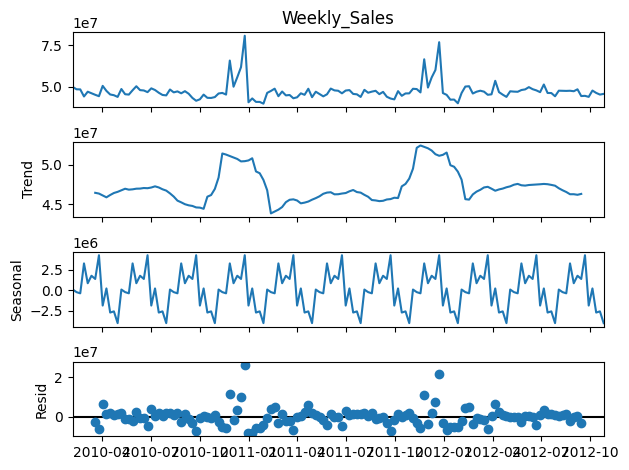

In [59]:
print(decomposition.plot())# Plotting the components of the data

In [60]:
mean1=df_stores_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=df_stores_sales.rolling(window=10).std() # Creating the Rolling standard deviation

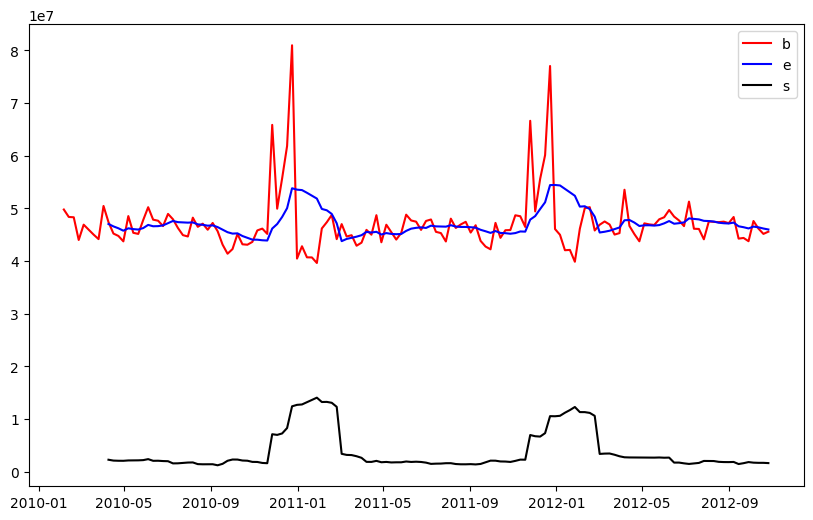

In [61]:
# plotting the rolling mean and standard deviation with respect to weekly sales
plt.figure(figsize=(10,6))
orig=plt.plot(df_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

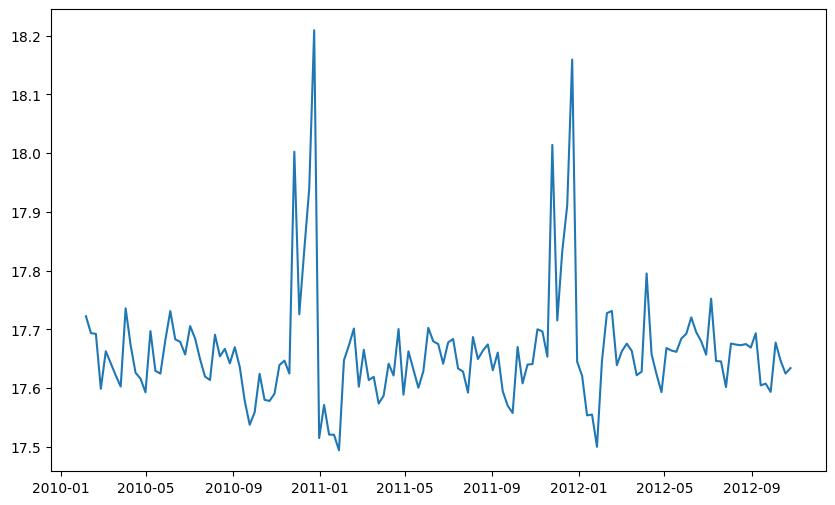

In [62]:
df_log = np.log(df_stores_sales)# applaying log transformation to the data
plt.figure(figsize=(10,6))
plt.plot(df_log)

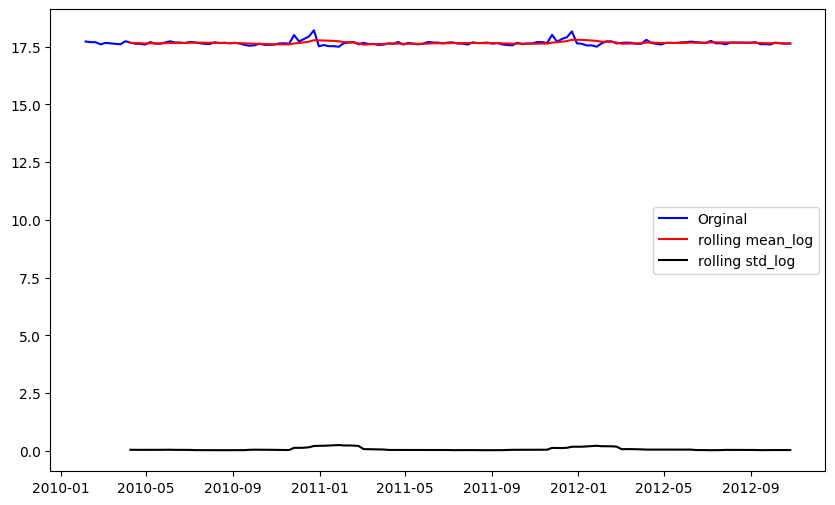

In [63]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation are colse
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(10,6))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [64]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [65]:
df_new.dropna(inplace = True) # dropping the nan values

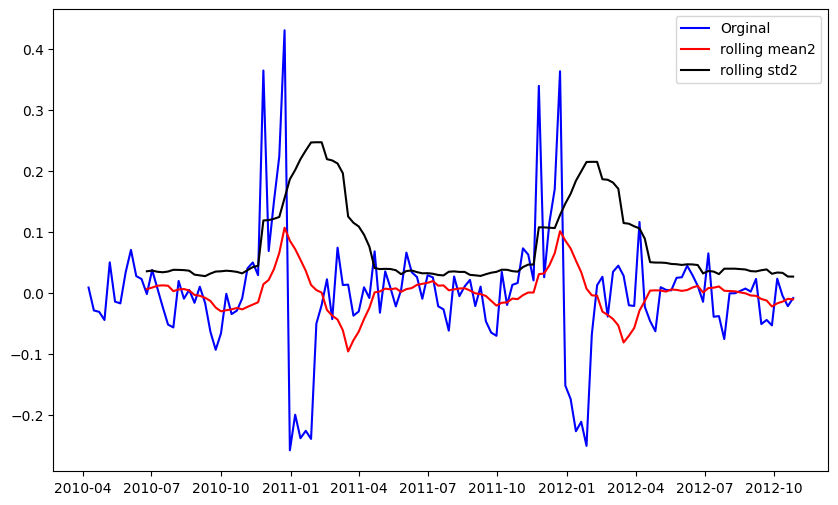

In [66]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(10,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [67]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.941663e+00
p-value                 1.021389e-09
# lags used             4.000000e+00
# observations          1.290000e+02
critical value (1%)    -3.482088e+00
critical value (5%)    -2.884219e+00
critical value (10%)   -2.578864e+00
Rejects the null hypothesis
Data has no unit root and is stationary


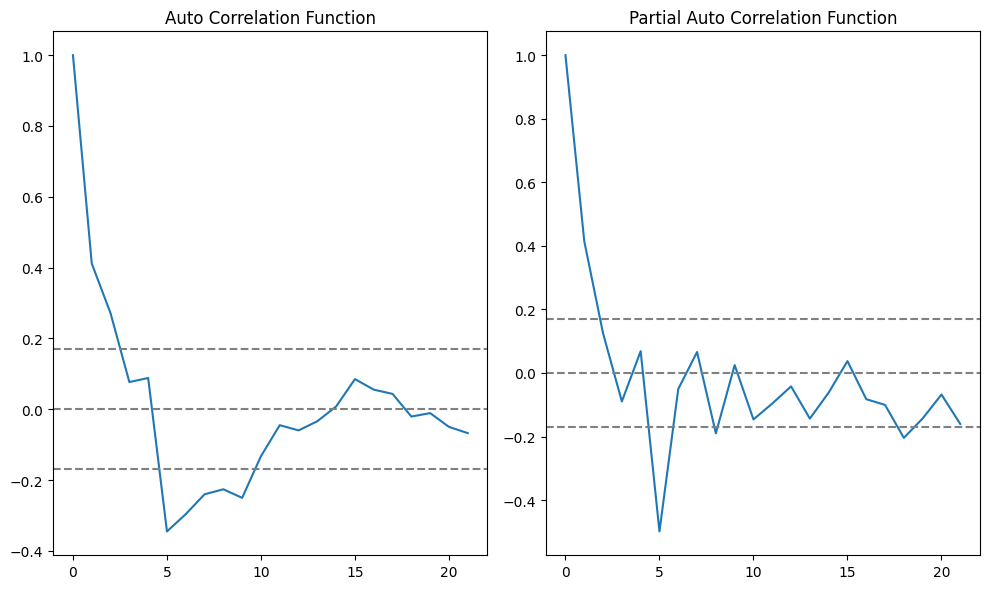

In [68]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# Calculate autocorrelation and partial autocorrelation values
lag_acf = acf(df_new)
lag_pacf = pacf(df_new)

# Plot ACf
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.title('Partial Auto Correlation Function')
plt.tight_layout()

plt.show()


In [69]:
# Buliding the ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(5, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


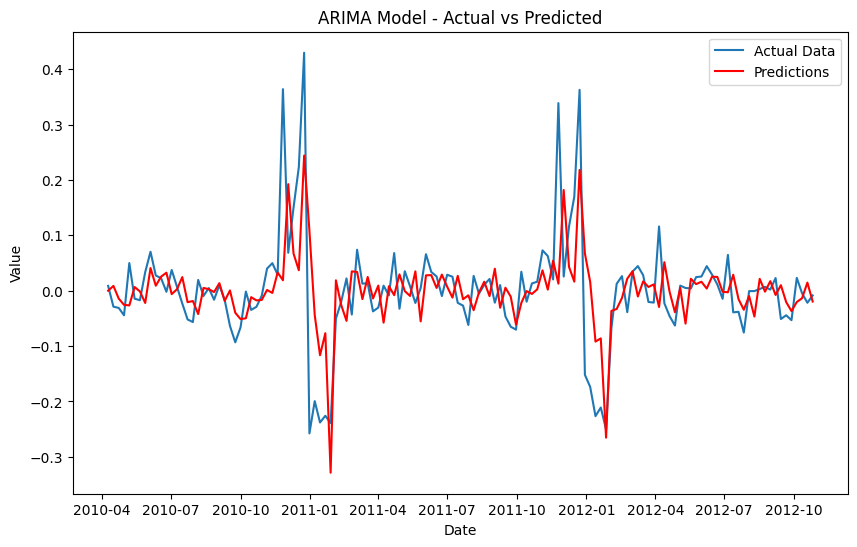

In [70]:
plt.figure(figsize=(10,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error{mse}')

Mean Squared_Error0.006757997906163831


In [72]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error{rmse}')

Root Mean Squared_Error0.08220704292312084




---



**Store Wise prediction**

**Store 1 Sales Prediction**

In [73]:
# Creating a new data frame for store 1 sales forecast
store1_sales=df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [74]:
store1_sales.set_index('Date',inplace=True) # Setting the date column as an index

In [75]:
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.102186
p-value                   0.000014
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Rejects the null hypothesis
Data has no unit root and is stationary


In [76]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)

Figure(640x480)


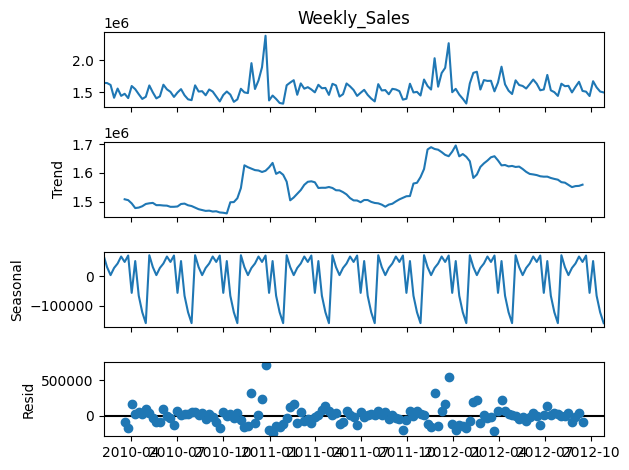

In [77]:
print(decomposition.plot())

In [78]:
mean1=store1_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store1_sales.rolling(window=10).std() # Creating the Rolling standard deviation

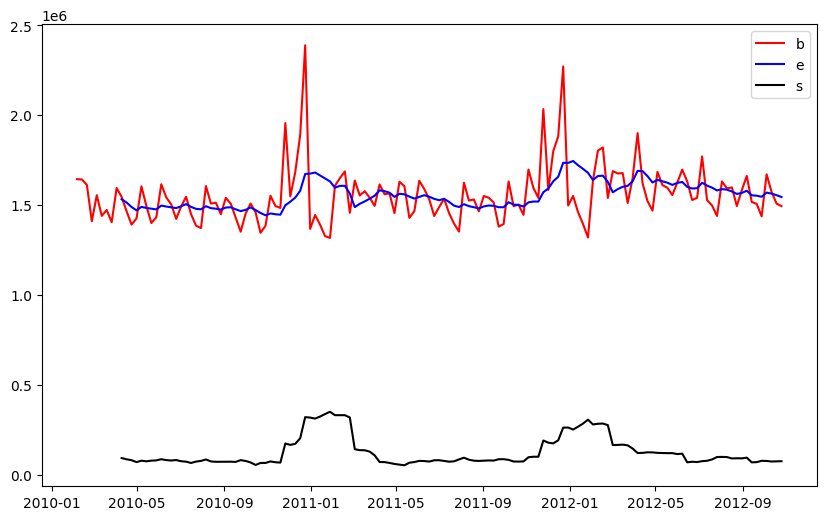

In [79]:
# plotting the rolling mean
plt.figure(figsize=(10,6))
orig=plt.plot(store1_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

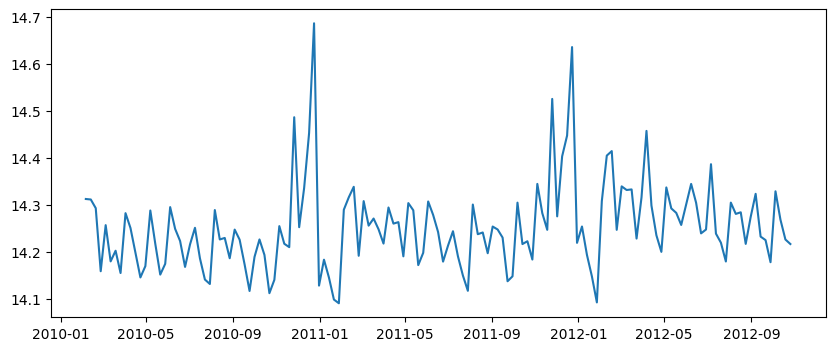

In [80]:
df_log = np.log(store1_sales)# applaying log transformation to the data
plt.figure(figsize=(10,4))
plt.plot(df_log)

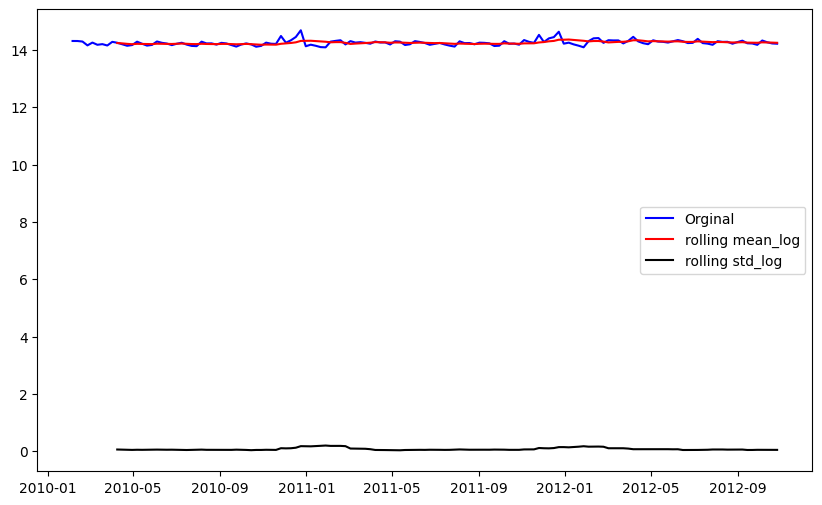

In [81]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(10,6))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [82]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [83]:
df_new.dropna(inplace = True) # dropping the nan values

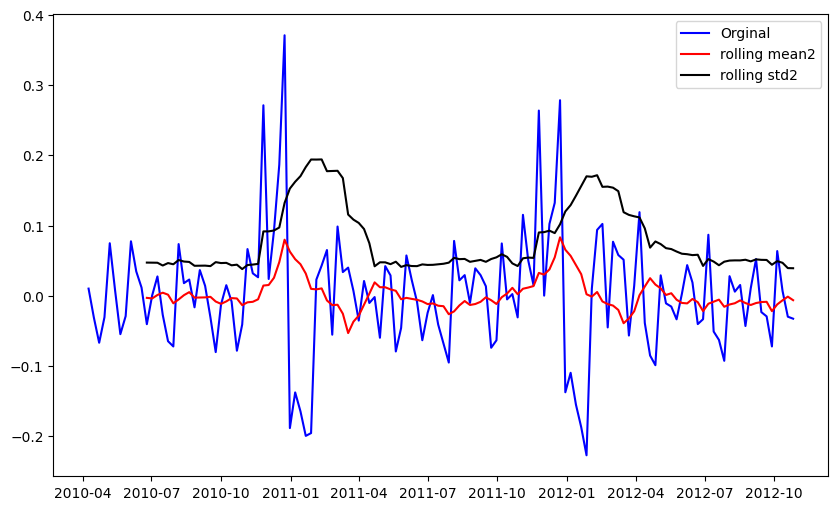

In [84]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(10,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [85]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.668147e+00
p-value                 4.660760e-09
# lags used             4.000000e+00
# observations          1.290000e+02
critical value (1%)    -3.482088e+00
critical value (5%)    -2.884219e+00
critical value (10%)   -2.578864e+00
Rejects the null hypothesis
Data has no unit root and is stationary


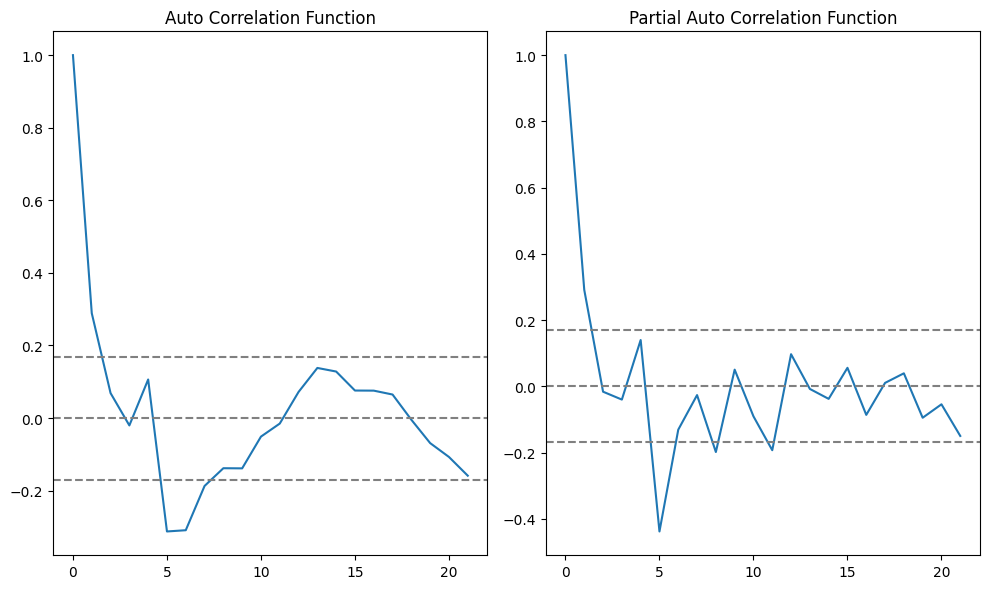

In [86]:
# Calculate autocorrelation and partial autocorrelation values
lag_acf = acf(df_new)
lag_pacf = pacf(df_new)

# Plot ACF
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.title('Partial Auto Correlation Function')
plt.tight_layout()

plt.show()

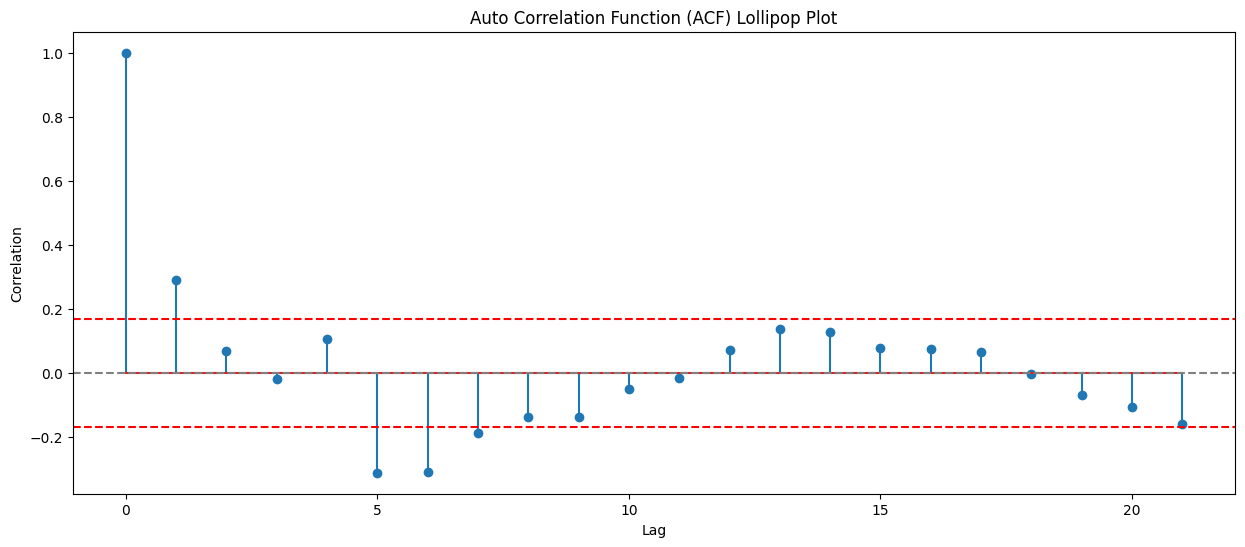

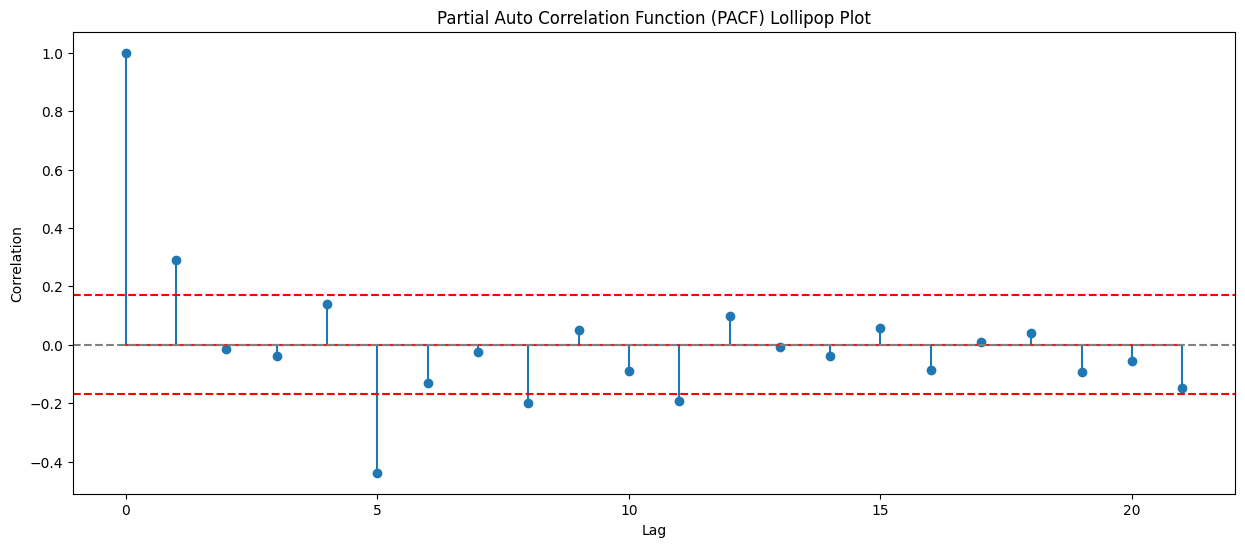

In [87]:
# Define function to create lollipop plot with significance level
def lollipop_plot(values, title, significance_level=0.05):
    plt.figure(figsize=(15, 6))
    plt.stem(values)
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Correlation')

    # Add horizontal lines for significance level
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='red')  # Lower significance level
    plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='red')   # Upper significance level

    plt.show()

# Plot ACF as lollipop plot with significance level
lollipop_plot(lag_acf, 'Auto Correlation Function (ACF) Lollipop Plot')

# Plot PACF as lollipop plot with significance level
lollipop_plot(lag_pacf, 'Partial Auto Correlation Function (PACF) Lollipop Plot')


In [88]:
p, d, q = 2, 1, 2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


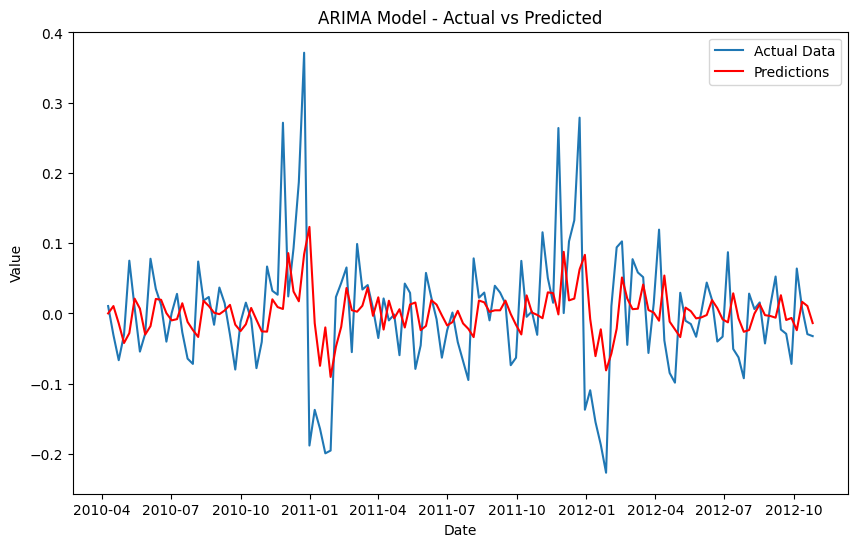

In [89]:
plt.figure(figsize=(10,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.006983015956012575


In [91]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.0835644419356258


In [92]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [93]:
import pandas as pd

# Define the end date of the actual data
end_date_actual_data = '2012-12-10'  # Replace this with the actual end date of your dataset

# Convert the end date of the actual data to datetime format
end_date_actual_data = pd.to_datetime(end_date_actual_data)

# Define the number of weeks to forecast
forecast_weeks = 12

# Generate dates for the forecasted period
forecast_start_date = end_date_actual_data + pd.DateOffset(weeks=1)  # Start from the week after the end date
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_weeks, freq='W')

print(f"Forecast Start Date: {forecast_start_date}")
print("Forecast Dates:")
print(forecast_dates)



Forecast Start Date: 2012-12-17 00:00:00
Forecast Dates:
DatetimeIndex(['2012-12-23', '2012-12-30', '2013-01-06', '2013-01-13',
               '2013-01-20', '2013-01-27', '2013-02-03', '2013-02-10',
               '2013-02-17', '2013-02-24', '2013-03-03', '2013-03-10'],
              dtype='datetime64[ns]', freq='W-SUN')


In [94]:
# Create the DataFrame with forecasted dates and sales values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

# Print the forecast DataFrame
print(forecast_df)

                 Date  Forecasted_Sales
2012-11-02 2012-12-23         -0.006478
2012-11-09 2012-12-30         -0.006093
2012-11-16 2013-01-06          0.002047
2012-11-23 2013-01-13         -0.002274
2012-11-30 2013-01-20          0.002713
2012-12-07 2013-01-27         -0.001405
2012-12-14 2013-02-03          0.002454
2012-12-21 2013-02-10         -0.000982
2012-12-28 2013-02-17          0.002140
2013-01-04 2013-02-24         -0.000675
2013-01-11 2013-03-03          0.001870
2013-01-18 2013-03-10         -0.000428


In [95]:
forecast_df.set_index('Date',inplace=True)

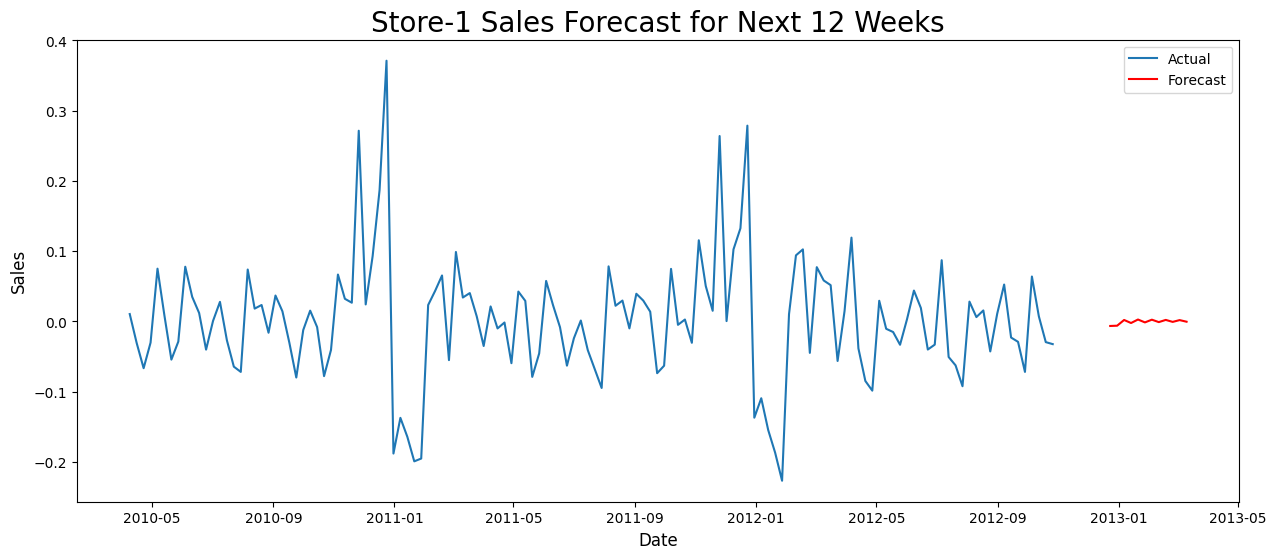

In [96]:
plt.figure(figsize=(15, 6))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [97]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.0835644419356258




---



Store 14 Sales Prediction

In [99]:
# Creating a new data frame for store 1 sales forecast
store14_sales=df[df['Store']==14].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [100]:
store14_sales.set_index('Date',inplace=True) # Setting the date column as an index

In [101]:
adf_test(store14_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -2.736887
p-value                   0.067870
# lags used               6.000000
# observations          136.000000
critical value (1%)      -3.479372
critical value (5%)      -2.883037
critical value (10%)     -2.578234
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [102]:
decomposition=seasonal_decompose(store14_sales['Weekly_Sales'],period=13)

Figure(640x480)


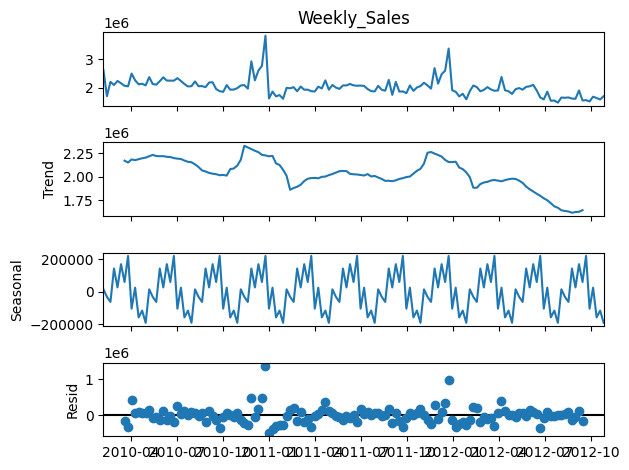

In [103]:
print(decomposition.plot())

In [105]:
mean1=store14_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store14_sales.rolling(window=10).std() # Creating the Rolling standard deviation

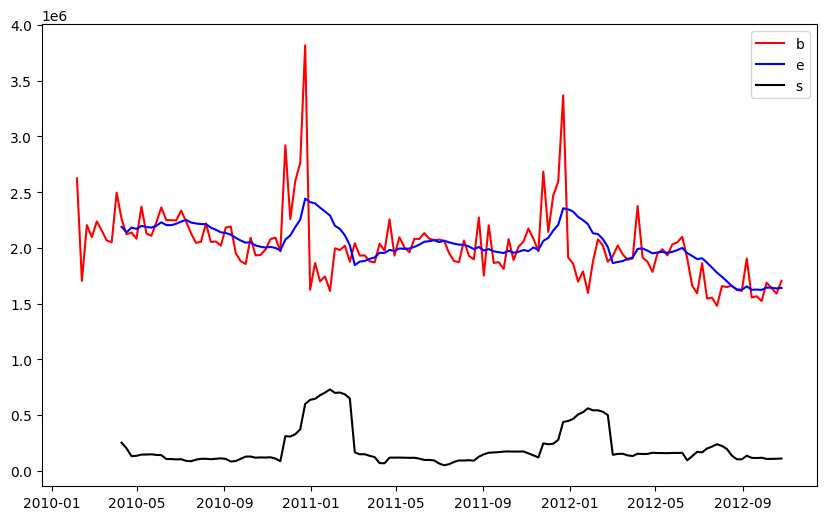

In [106]:
# plotting the rolling mean
plt.figure(figsize=(10,6))
orig=plt.plot(store14_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)


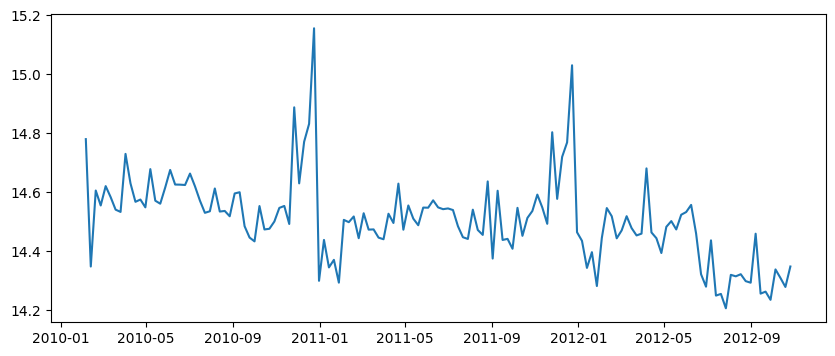

In [107]:
df_log = np.log(store14_sales)# applaying log transformation to the data
plt.figure(figsize=(10,4))
plt.plot(df_log)

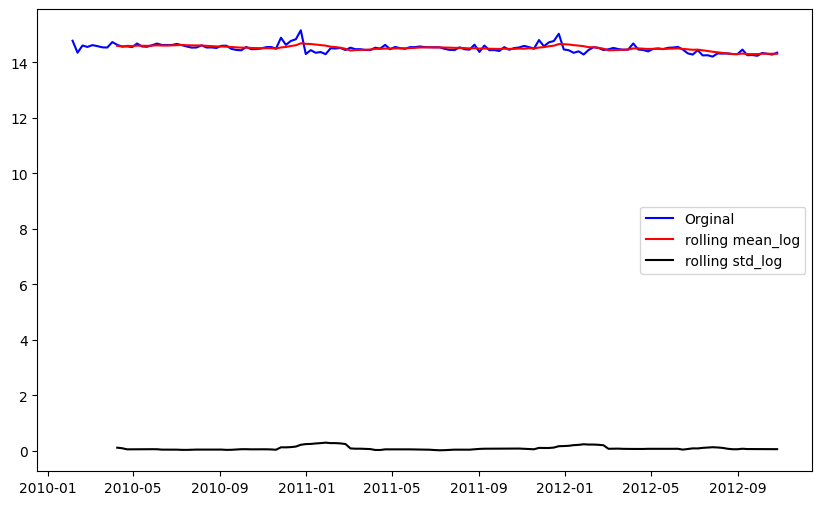

In [108]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(10,6))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [109]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [110]:
df_new.dropna(inplace = True) # dropping the nan values


In [111]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

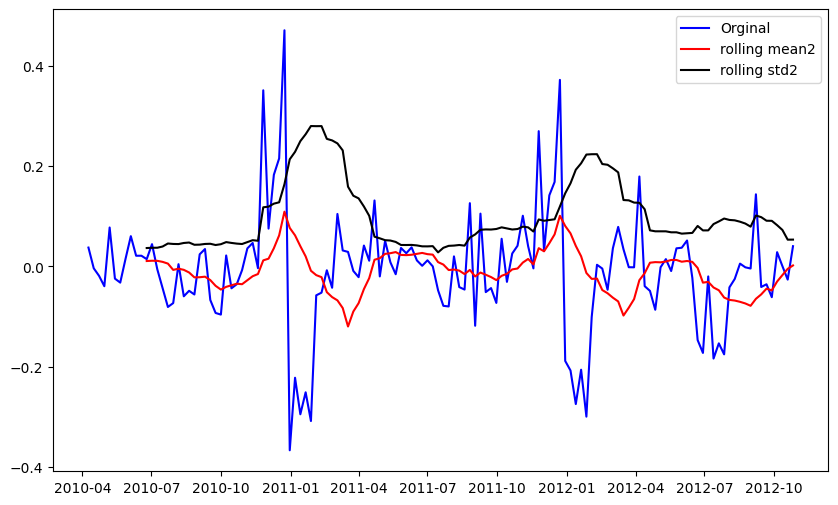

In [112]:
plt.figure(figsize=(10,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [113]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.486029e+00
p-value                 1.260292e-08
# lags used             4.000000e+00
# observations          1.290000e+02
critical value (1%)    -3.482088e+00
critical value (5%)    -2.884219e+00
critical value (10%)   -2.578864e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [114]:
# Calculate autocorrelation and partial autocorrelation values
lag_acf = acf(df_new)
lag_pacf = pacf(df_new)


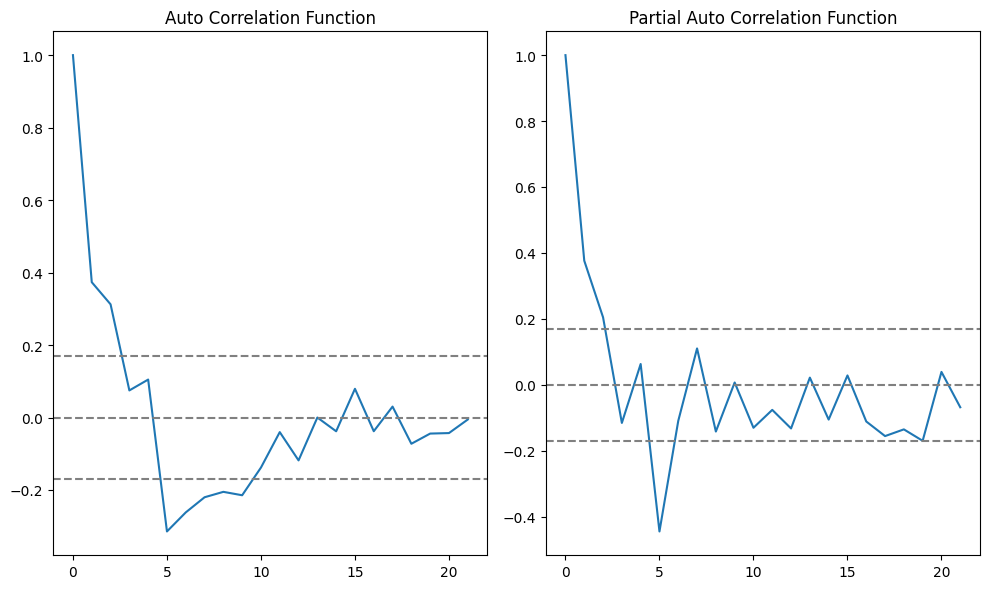

In [115]:
# Plot ACF
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.title('Partial Auto Correlation Function')
plt.tight_layout()

plt.show()

In [116]:
# Define function to create lollipop plot with significance level
def lollipop_plot(values, title, significance_level=0.05):
    plt.figure(figsize=(15, 6))
    plt.stem(values)
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Correlation')

    # Add horizontal lines for significance level
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='red')  # Lower significance level
    plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='red')   # Upper significance level

    plt.show()

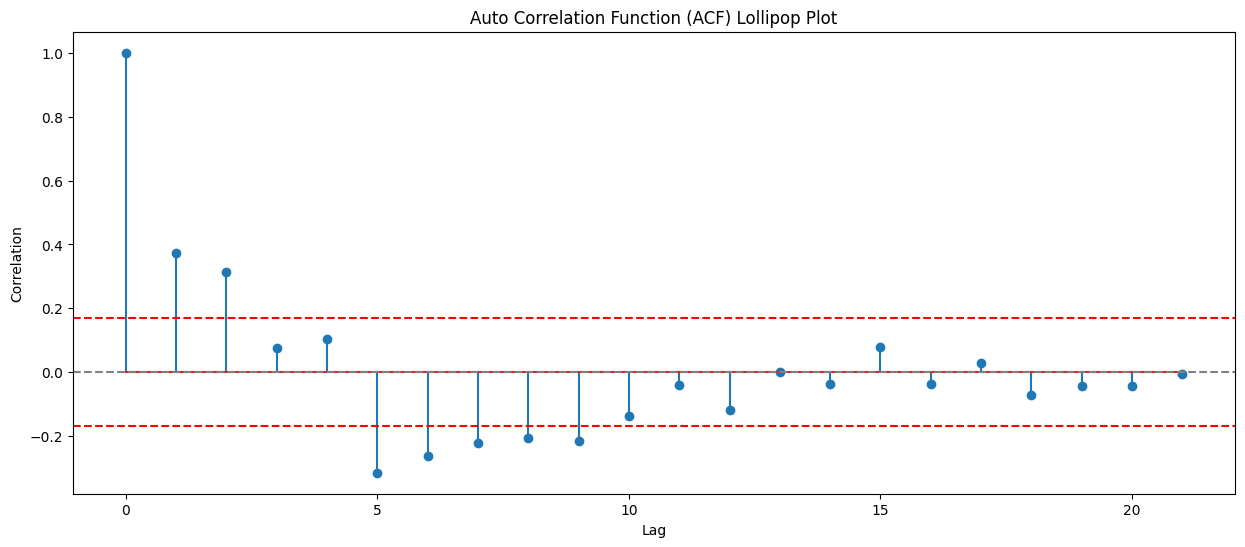

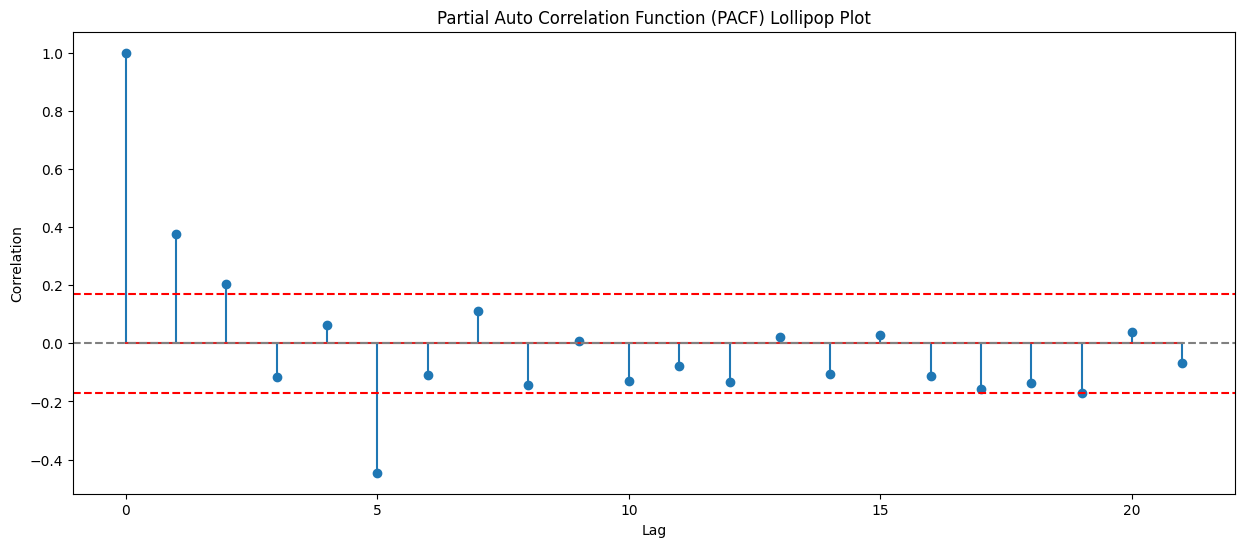

In [117]:
# Plot ACF as lollipop plot with significance level
lollipop_plot(lag_acf, 'Auto Correlation Function (ACF) Lollipop Plot')

# Plot PACF as lollipop plot with significance level
lollipop_plot(lag_pacf, 'Partial Auto Correlation Function (PACF) Lollipop Plot')


In [118]:
p, d, q = 2, 1, 2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


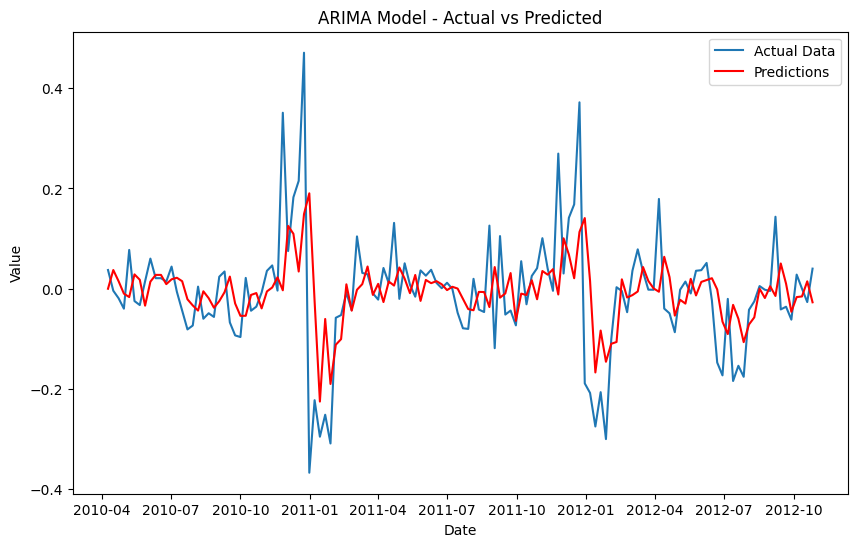

In [119]:
plt.figure(figsize=(10,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [120]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')



Mean Squared_Error  0.011131836022818782


In [121]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')



Root Mean Squared_Error  0.10550751642806679


In [122]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [123]:
# Define the end date of the actual data
end_date_actual_data = '2012-12-10'  # Replace this with the actual end date of your dataset

In [124]:
# Convert the end date of the actual data to datetime format
end_date_actual_data = pd.to_datetime(end_date_actual_data)



In [125]:
# Define the number of weeks to forecast
forecast_weeks = 12

# Generate dates for the forecasted period
forecast_start_date = end_date_actual_data + pd.DateOffset(weeks=1)  # Start from the week after the end date
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_weeks, freq='W')

print(f"Forecast Start Date: {forecast_start_date}")
print("Forecast Dates:")
print(forecast_dates)


Forecast Start Date: 2012-12-17 00:00:00
Forecast Dates:
DatetimeIndex(['2012-12-23', '2012-12-30', '2013-01-06', '2013-01-13',
               '2013-01-20', '2013-01-27', '2013-02-03', '2013-02-10',
               '2013-02-17', '2013-02-24', '2013-03-03', '2013-03-10'],
              dtype='datetime64[ns]', freq='W-SUN')


In [126]:
# Create the DataFrame with forecasted dates and sales values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})


In [127]:
# Print the forecast DataFrame
print(forecast_df)


                 Date  Forecasted_Sales
2012-11-02 2012-12-23          0.011753
2012-11-09 2012-12-30          0.006950
2012-11-16 2013-01-06         -0.004398
2012-11-23 2013-01-13         -0.003194
2012-11-30 2013-01-20         -0.008663
2012-12-07 2013-01-27         -0.006498
2012-12-14 2013-02-03         -0.009603
2012-12-21 2013-02-10         -0.007707
2012-12-28 2013-02-17         -0.009668
2013-01-04 2013-02-24         -0.008232
2013-01-11 2013-03-03         -0.009542
2013-01-18 2013-03-10         -0.008507


In [128]:
forecast_df.set_index('Date',inplace=True)

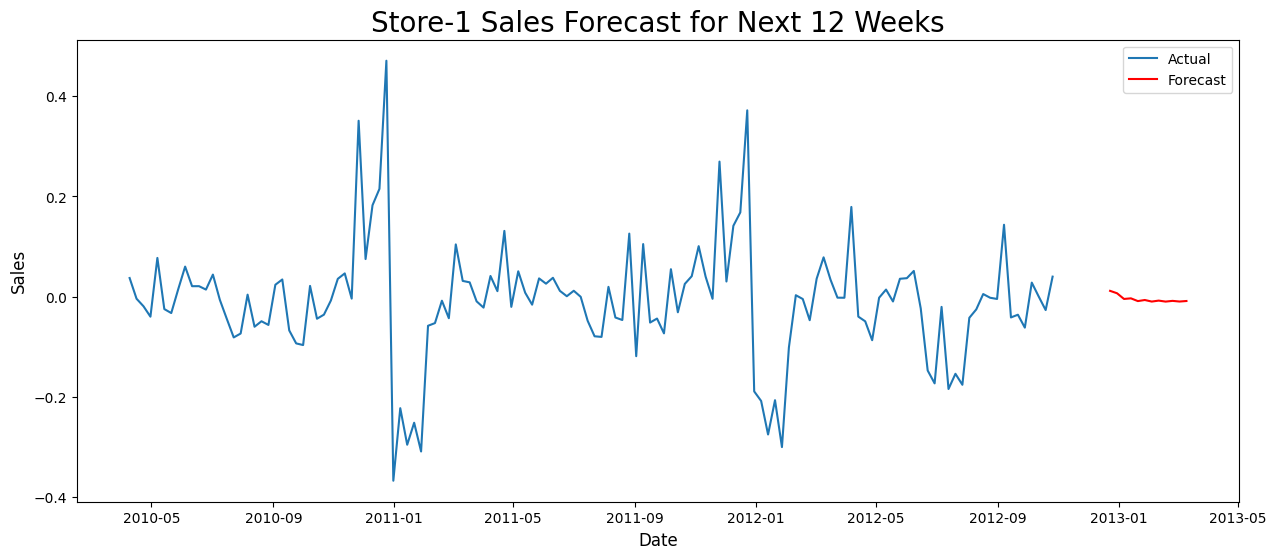

In [129]:
plt.figure(figsize=(15, 6))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [130]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.10550751642806679
